In [1]:
%matplotlib inline

# Wine Quality Regression Analysis

This notebook demonstrates the use of regression analyses to predict the quality of wine from physiochemical properties. 

In [12]:
import os 

import numpy as np 
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt 

It's always a good idea to create variables to store paths at the top of your file, so you can easily change and adapt them as needed. If you're running the notebook locally, change the paths to the location of the datasets on your computer.

In [6]:
# Data Directories
DATA = os.path.abspath("../data")
WINE = os.path.join(DATA, "winequality")

# Paths to Data Files 
RED_WINE = os.path.join(WINE, 'winequality-red.csv')
WHITE_WINE = os.path.join(WINE, 'winequality-white.csv')

Load the red or white wine datasets into a Pandas dataframe, then use `head()` and `describe()` to get a sense of the contents of data. 

In [9]:
reds = pd.read_csv(RED_WINE, delimiter=";")

In [10]:
reds.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [11]:
reds.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


Get the columns for the features and the target. 

In [17]:
features = [u'fixed acidity', u'volatile acidity', u'citric acid',
            u'residual sugar', u'chlorides', u'free sulfur dioxide',
            u'total sulfur dioxide', u'density', u'pH', u'sulphates', 
            u'alcohol',]

target = u'quality'

We can use high dimensional visualization techniques like radviz to get a sense of the contents of the data. 

In [21]:
from pandas.tools.plotting import radviz

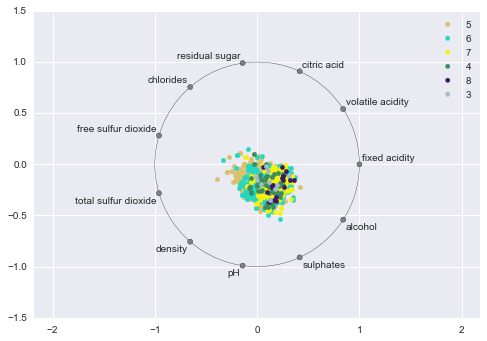

In [24]:
radviz(reds, "quality")

## Regression Analysis 

In order to conduct regression analysis we need to divide the data set into training and testing splits. We will fit the model on the training data and evaluate it on the test data. For now we'll split the data into 80/20 splits.

In [27]:
from sklearn.cross_validation import train_test_split as tts 

X = reds[features]
y = reds[target]

X_train, X_test, y_train, y_test = tts(X, y, test_size=0.2)

As a baseline, we'll take a look at OLS and regular linear regression, getting the $r^2$ score:

In [31]:
from sklearn.linear_model import LinearRegression 

ols = LinearRegression()
ols.fit(X_train, y_train)

ols.score(X_test, y_test)

/usr/local/lib/python2.7/site-packages/scipy/linalg/basic.py:884: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  warnings.warn(mesg, RuntimeWarning)


0.32002232178632384

Next we'll move to regularization methods. We'll use 400 alphas and the CV regularizers so that we don't have to select the magnitude of our regularization ahead of time. We'll employ L1, L2, and L1+L2 regularization (Lasso, Ridge, and ElasticNet) and compare the results. 

In [32]:
alphas = np.logspace(-10, -2, 400)

In [39]:
from sklearn.linear_model import RidgeCV, LassoCV, LassoLarsCV, ElasticNetCV

In [43]:
regmodels = [
    RidgeCV(alphas=alphas),
    LassoCV(alphas=alphas),
    ElasticNetCV(alphas=alphas),
]

for model in regmodels:
    model.fit(X_train, y_train)
    score = model.score(X_test, y_test)
    print("{}: {:0.6f}".format(model.__class__.__name__, score))

RidgeCV: 0.319481
LassoCV: 0.319901
ElasticNetCV: 0.319725


In the above code, we ran approximately 1200 models -- 400 alphas for 3 model forms; pretty good! We can also try alternative regressors like the `RandomForestRegressor`:

In [44]:
from sklearn.ensemble import RandomForestRegressor 

rfor = RandomForestRegressor()
rfor.fit(X_train, y_train)
rfor.score(X_test, y_test)

0.4000505178075271

Perhaps normalization will improve our models? We'll also bring in RANSAC and OMP to see if they are more effective, constructing pipelines that add normalization to the modeling process. 

In [46]:
from sklearn.pipeline import Pipeline 
from sklearn.preprocessing import MinMaxScaler

In [51]:
from sklearn.linear_model import RANSACRegressor, OrthogonalMatchingPursuit

regmodels = [
    LinearRegression(),
    RidgeCV(alphas=alphas),
    LassoCV(alphas=alphas),
    ElasticNetCV(alphas=alphas),
    RandomForestRegressor(), 
    RANSACRegressor(),
    OrthogonalMatchingPursuit(),
]

for model in regmodels:
    pmodel = Pipeline([
            ('norm', MinMaxScaler()), 
            ('reg', model)
        ])
    
    pmodel.fit(X_train, y_train)
    score = pmodel.score(X_test, y_test)
    print("Normalized {}: {:0.6f}".format(model.__class__.__name__, score))

Normalized LinearRegression: 0.320022
Normalized RidgeCV: 0.320078
Normalized LassoCV: 0.320380
Normalized ElasticNetCV: 0.321077
Normalized RandomForestRegressor: 0.377873
Normalized RANSACRegressor: 0.216689
Normalized OrthogonalMatchingPursuit: 0.186790


Not all models have to be linear, perhaps there is a quadratic fit of physiochemical properties to quality. We'll use a pipeline once again to construct our polynomial features:

In [52]:
from sklearn.preprocessing import PolynomialFeatures

regmodels = [
    LinearRegression(),
    RidgeCV(alphas=alphas),
    LassoCV(alphas=alphas),
    ElasticNetCV(alphas=alphas),
    RandomForestRegressor(), 
    RANSACRegressor(),
    OrthogonalMatchingPursuit(),
]

for model in regmodels:
    pmodel = Pipeline([
            ('poly', PolynomialFeatures(2)), 
            ('reg', model)
        ])
    
    pmodel.fit(X_train, y_train)
    score = pmodel.score(X_test, y_test)
    print("Normalized {}: {:0.6f}".format(model.__class__.__name__, score))

Normalized LinearRegression: 0.296712
Normalized RidgeCV: 0.310583


/usr/local/lib/python2.7/site-packages/sklearn/linear_model/coordinate_descent.py:466: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations
  ConvergenceWarning)


Normalized LassoCV: 0.330339
Normalized ElasticNetCV: 0.329243
Normalized RandomForestRegressor: 0.357262
Normalized RANSACRegressor: -10.377534
Normalized OrthogonalMatchingPursuit: 0.317606


So - can we predict quality based on the chemical properties of wine? Can we convert our analysis to a classification analysis? Do we need more instances to do better? What other techniques can we employ?